<a href="https://colab.research.google.com/github/putricinto/Machine-Learning-Project---MLCC/blob/master/Exercise1_Bank_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Classification**

*Bangkit DPS-1 Assignment: First Machine Learning Project*


**Read in the csv data with pandas**





In [0]:
%tensorflow_version 2.x

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [48]:
url = 'https://raw.githubusercontent.com/putricinto/Machine-Learning-Project---MLCC/master/bank.csv'
bank = pd.read_csv(url)
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [49]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [50]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [51]:
np.sum(bank.isnull())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

**Convert the Label column to 0s and 1s instead of strings**

In [52]:
bank['deposit'] = bank['deposit'].replace('yes', 1)
bank['deposit'] = bank['deposit'].replace('no', 0)
bank['deposit']

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

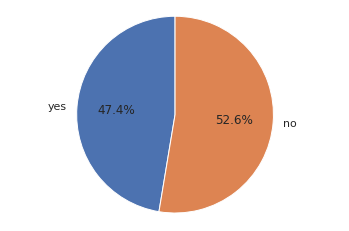

In [53]:
y=list(bank['deposit'])
labels = 'yes', 'no'
sizes = [y.count(1), y.count(0)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

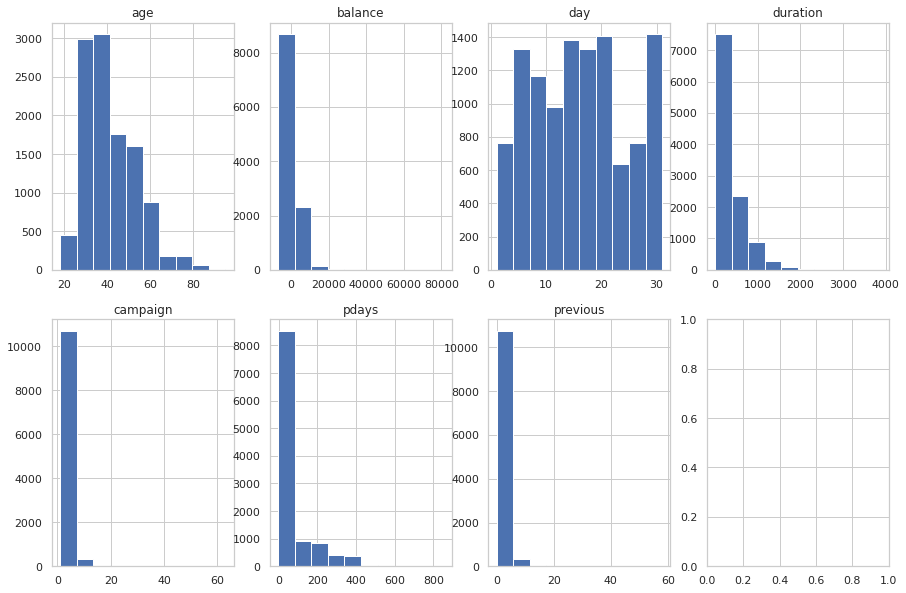

In [54]:
fig, axs = plt.subplots(2, 4, figsize=(15, 10))

colors = ['pink']
axs[0, 0].hist(bank['age'])
axs[0, 0].set_title('age')

axs[0, 1].hist(bank['balance'])
axs[0, 1].set_title('balance')

axs[0, 2].hist(bank['day'])
axs[0, 2].set_title('day')

axs[0, 3].hist(bank['duration'])
axs[0, 3].set_title('duration')

axs[1, 0].hist(bank['campaign'])
axs[1, 0].set_title('campaign')

axs[1, 1].hist(bank['pdays'])
axs[1, 1].set_title('pdays')

axs[1, 2].hist(bank['previous'])
axs[1, 2].set_title('previous')

plt.show()

In [0]:
def pdays(row):
    if row['pdays'] == -1:
        val = 0
    else:
        val = 1
    return val
def previous(row):
    if row['previous'] == 0:
        val = 0
    else:
        val = 1
    return val
def campaign(row):
    if row['campaign'] == 0:
        val = 0
    else:
        val = 1
    return val
def balance(row):
    if row['balance'] == 0:
        val = 0
    elif row['balance']<0:
        val = -1
    else:
        val = 1
    return val
def duration_bin1(row):
    if row['duration']<=1000:
        val = 1
    else:
        val = 0
    return val
def duration_bin2(row):
    if 1000<row['duration']<=2000:
        val = 1
    else:
        val = 0
    return val
def duration_bin3(row):
    if 2000<row['duration']<=3000:
        val = 1
    else:
        val = 0
    return val
bank['pdays_1'] = bank.apply(pdays, axis=1)
bank['previous_1'] = bank.apply(previous, axis=1)
bank['campaign_1'] = bank.apply(campaign, axis=1)
bank['balance_1'] = bank.apply(balance, axis=1)
bank['duration_bin1']=bank.apply(duration_bin1, axis=1)
bank['duration_bin2']=bank.apply(duration_bin2, axis=1)
bank['duration_bin3']=bank.apply(duration_bin3, axis=1)

In [0]:
bank=bank.drop(['pdays','previous','campaign','balance','duration'],1)

In [57]:
bank1=bank.drop(['job','marital','education','default','housing','loan','contact','month','poutcome','pdays_1','previous_1','campaign_1','balance_1','duration_bin1','duration_bin2','duration_bin3','deposit'],1)
#Mengatasi Outlier
import numpy as np
from scipy import stats
z=np.abs(stats.zscore(bank1._get_numeric_data()))
print(z)
bank=bank[(z<3).all(axis=1)]
print(bank.shape)

[[1.49150488 1.26574556]
 [1.23967567 1.26574556]
 [0.0194704  1.26574556]
 ...
 [0.77495804 0.39689074]
 [0.14841574 0.90946635]
 [0.6070719  0.79070662]]
(11030, 19)


In [58]:
bank.describe()

,age,day,deposit,pdays_1,previous_1,campaign_1,balance_1,duration_bin1,duration_bin2,duration_bin3
count,11030.000000,11030.000000,11030.000000,11030.000000,11030.000000,11030.0,11030.000000,11030.000000,11030.000000,11030.000000
mean,40.756936,15.664823,0.470354,0.252312,0.252312,1.0,0.805893,0.936899,0.060199,0.002267
std,11.151027,8.424056,0.499143,0.434359,0.434359,0.0,0.530288,0.243155,0.237867,0.047556
min,18.000000,1.000000,0.000000,0.000000,0.000000,1.0,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,8.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.000000,0.000000
50%,38.000000,15.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.000000,0.000000
75%,49.000000,22.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,0.000000
max,76.000000,31.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000


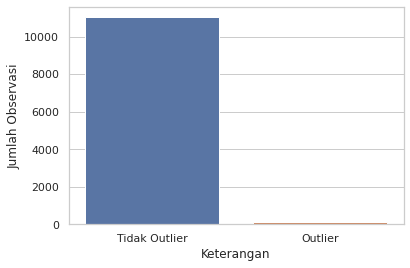

In [59]:
#Jumlah Outlier
sns.set(style="whitegrid")
c=pd.DataFrame([])
c['Keterangan']=["Tidak Outlier","Outlier"]
c['Jumlah Observasi']=[11030,132]
bx = sns.barplot(x="Keterangan", y="Jumlah Observasi",data=c)
plt.show()

Text(0.5, 1.0, 'day')

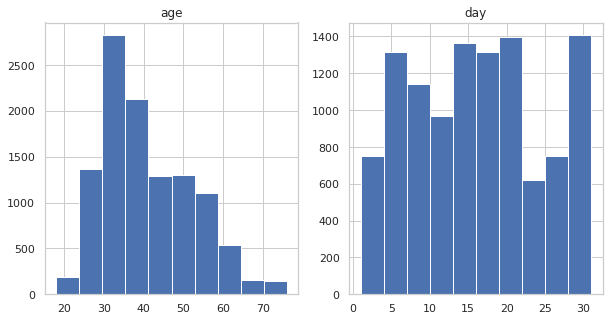

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

colors = ['pink']
axs[0].hist(bank['age'])
axs[0].set_title('age')

axs[1].hist(bank['day'])
axs[1].set_title('day')

In [61]:
bank

,age,job,marital,education,default,housing,loan,contact,day,month,poutcome,deposit,pdays_1,previous_1,campaign_1,balance_1,duration_bin1,duration_bin2,duration_bin3
0,59,admin.,married,secondary,no,yes,no,unknown,5,may,unknown,1,0,0,1,1,0,1,0
1,56,admin.,married,secondary,no,no,no,unknown,5,may,unknown,1,0,0,1,1,0,1,0
2,41,technician,married,secondary,no,yes,no,unknown,5,may,unknown,1,0,0,1,1,0,1,0
3,55,services,married,secondary,no,yes,no,unknown,5,may,unknown,1,0,0,1,1,1,0,0
4,54,admin.,married,tertiary,no,no,no,unknown,5,may,unknown,1,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,yes,no,cellular,20,apr,unknown,0,0,0,1,1,1,0,0
11158,39,services,married,secondary,no,no,no,unknown,16,jun,unknown,0,0,0,1,1,1,0,0
11159,32,technician,single,secondary,no,no,no,cellular,19,aug,unknown,0,0,0,1,1,1,0,0
11160,43,technician,married,secondary,no,no,yes,cellular,8,may,failure,0,1,1,1,0,1,0,0


In [70]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'day', 'month', 'poutcome', 'deposit', 'pdays_1',
       'previous_1', 'campaign_1', 'balance_1', 'duration_bin1',
       'duration_bin2', 'duration_bin3'],
      dtype='object')

**Create the Feature Columns for tf.esitmator**

In [0]:
job = feature_column.categorical_column_with_vocabulary_list(
      'job',['admin.','blue-collar','entrepreneur','housemaid','management',
             'retired','self-employed','services','student','technician',
             'unemployed','unknown']
)
marital = feature_column.categorical_column_with_vocabulary_list(
      'marital',['divorced','married','single']
)
education = feature_column.categorical_column_with_vocabulary_list(
      'education',['primary','secondary','tertiary','unknown']
)
default = feature_column.categorical_column_with_vocabulary_list(
      'default',['no','yes']
)
housing = feature_column.categorical_column_with_vocabulary_list(
      'housing',['no','yes']
)
loan = feature_column.categorical_column_with_vocabulary_list(
      'loan',['no','yes']
)
contact = feature_column.categorical_column_with_vocabulary_list(
      'contact',['cellular','telephone','unknown']
)
month = feature_column.categorical_column_with_vocabulary_list(
      'month',['jan','feb','mar','apr','may','jun','jul','aug','sep','oct',
               'nov','dec']
)
poutcome = feature_column.categorical_column_with_vocabulary_list(
      'poutcome',['failure','success','unknown','other']
)

In [0]:
job_hot = feature_column.indicator_column(job)
marital_hot = feature_column.indicator_column(marital)
education_hot = feature_column.indicator_column(education)
default_hot = feature_column.indicator_column(default)
housing_hot = feature_column.indicator_column(housing)
loan_hot = feature_column.indicator_column(loan)
contact_hot = feature_column.indicator_column(contact)
month_hot = feature_column.indicator_column(month)
poutcome_hot = feature_column.indicator_column(poutcome)

In [0]:
age = feature_column.numeric_column("age")
#balance = feature_column.numeric_column("balance")
day = feature_column.numeric_column("day")
#duration = feature_column.numeric_column("duration")
#campaign = feature_column.numeric_column("campaign")
#pdays = feature_column.numeric_column("pdays")
#previous = feature_column.numeric_column("previous")

**Perform a Train Test Split on the Data**

In [0]:
x_data = bank.drop('deposit',axis=1)
y_labels = bank['deposit']
X_train, X_test, y_train, y_test = train_test_split(
      x_data,y_labels,test_size=0.3,random_state=101)

**Put all these variables into a single list with the variable name feat_cols**

In [0]:
feat_cols = [job_hot,marital_hot,education_hot,default_hot,housing_hot,
             loan_hot,contact_hot,month_hot,poutcome_hot,age,day]

**Create Input Function**

In [0]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train,
                                                 y=y_train,
                                                 batch_size=10,
                                                 num_epochs=None,
                                                 shuffle=True)

**Create your model with tf.estimator**

In [77]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpg59klsjv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


**Train your model on the data, for at least 5000 steps**

In [78]:
model.train(input_fn=input_func,steps=5000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpg59klsjv/model.ckpt.
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 281.925
INFO:tensorflow:loss = 0.7549561, step = 100 (0.359 sec)
INFO:tensorflow:global_step/sec: 321.529
INFO:tensorflow:loss = 0.56544304, step = 200 (0.308 sec)

**Create a prediction input function**

In [0]:
pred_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=X_test,batch_size=len(X_test),shuffle=False)

**Use model.predict() and pass in your input function**

In [81]:
predictions = list(model.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpg59klsjv/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


**Each item in your list will look like this:**

In [82]:
predictions[0]

{'all_class_ids': array([0, 1], dtype=int32),
 'all_classes': array([b'0', b'1'], dtype=object),
 'class_ids': array([0]),
 'classes': array([b'0'], dtype=object),
 'logistic': array([0.0963715], dtype=float32),
 'logits': array([-2.2382078], dtype=float32),
 'probabilities': array([0.90362847, 0.0963715 ], dtype=float32)}

**Create a list of only the class_ids key values from the prediction list of dictionaries, these are the predictions you will use to compare against the real y_test values**

In [0]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['class_ids'][0])

In [84]:
final_preds[:20]

[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]

In [0]:
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=X_test,y=y_test,batch_size=len(X_test),shuffle=False)

In [87]:
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       0.63      0.94      0.75      1734
           1       0.85      0.39      0.53      1575

    accuracy                           0.68      3309
   macro avg       0.74      0.66      0.64      3309
weighted avg       0.74      0.68      0.65      3309



In [88]:
results = model.evaluate(eval_input_func)
results

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-03-26T09:28:10Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpg59klsjv/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.79214s
INFO:tensorflow:Finished evaluation at 2020-03-26-09:28:11
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.6769417, accuracy_baseline = 0.5240254, auc = 0.7515007, auc_precision_recall = 0.7592236, average_loss = 0.61749357, global_step = 5000, label/mean = 0.47597462, loss = 0.61749357, precision = 0.85434175, prediction/mean = 0.35654584, recall = 0.3873016
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmpg59klsjv/model.ckpt-5000


{'accuracy': 0.6769417,
 'accuracy_baseline': 0.5240254,
 'auc': 0.7515007,
 'auc_precision_recall': 0.7592236,
 'average_loss': 0.61749357,
 'global_step': 5000,
 'label/mean': 0.47597462,
 'loss': 0.61749357,
 'precision': 0.85434175,
 'prediction/mean': 0.35654584,
 'recall': 0.3873016}